In [47]:
import numpy as np
import extract_features as fe
import config
import data_helpers as dh
import time
from datetime import timedelta
import pandas as pd
import mne
from mne import EvokedArray
import matplotlib.pyplot as plt
import scipy.io as io


In [15]:
# start = time.time()

features_all = pd.DataFrame(columns=['subj', 'feature_set', 'sample_id', 'feature_values', 'label'])

for subject in config.subjects:
    print(subject)
#     filename_nr = config.rootdir + "results" + subject + "_NR.mat"
    filename_tsr = config.rootdir + "results" + subject + "_TSR.mat"

#     f_nr = dh.read_mat_file(filename_nr)
    f_tsr = dh.read_mat_file(filename_tsr)

    if config.dataset is "zuco1_sr":  # include sentiment reading as NR
        filename_sr = config.rootdir + "results" + subject + "_SR.mat"
        f_sr = dh.read_mat_file(filename_sr)

    features = {}

    for feature_set in config.feature_sets:

        features[feature_set] = {}

#         fe.extract_sentence_features(subject, f_nr, feature_set, features, "NR")
        fe.extract_sentence_features(subject, f_tsr, feature_set, features, "TSR")
        if config.dataset is "zuco1_sr":
            fe.extract_sentence_features(subject, f_sr, feature_set, features, "NR")
        print(len(features[feature_set]), " samples collected for", feature_set)

        for x, y in features[feature_set].items():
            features_all = features_all.append({'subj': subject, 'feature_set': feature_set, 'sample_id': x, 'feature_values': np.array(y[:-1]), 'label':y[-1]}, ignore_index=True)

for feature_set in config.feature_sets:

    info = mne.create_info(ch_names=config.chanlocs, ch_types="eeg", sfreq=500)

#     features_nr = features_all.loc[(features_all['feature_set'] == feature_set) & (features_all['label'] == 'NR')]
#     mean_nr = features_nr['feature_values'].mean()

    features_tsr = features_all.loc[(features_all['feature_set'] == feature_set) & (features_all['label'] == 'TSR')]
    mean_tsr = features_tsr['feature_values'].mean()

#     diff = mean_nr - mean_tsr
    diff = mean_tsr

    # NR
    evoked_nr = EvokedArray(mean_tsr.reshape(-1,1), info=info)
    evoked_nr.set_montage("GSN-HydroCel-128")
    print(evoked_nr.info)
    evoked_nr.drop_channels([0])
    print(evoked_nr.info)

    fig, ax = plt.subplots(figsize=(7.5, 4.5), nrows=1, ncols=1)
    ax = evoked_nr.plot_topomap(title='EEG patterns', time_unit='s', units='a.u.', scalings=1, vmin=min(diff), cmap='RdBu')
    plt.savefig("NR-topo-AVG-ALL"+feature_set+".pdf")
    plt.close()

<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:25: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:25: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if config.dataset is "zuco1_sr":  # include sentiment reading as NR
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:25: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if config.dataset is "zuco1_sr":


YAC
390
271  samples collected for electrode_features_all


/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_all = features_all.append({'subj': subject, 'feature_set': feature_set, 'sample_id': x, 'feature_values': np.array(y[:-1]), 'label':y[-1]}, ignore_index=True)
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_all = features_all.append({'subj': subject, 'feature_set': feature_set, 'sample_id': x, 'feature_values': np.array(y[:-1]), 'label':y[-1]}, ignore_index=True)
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_all 

<Info | 8 non-empty values
 bads: []
 ch_names: E2, E3, E4, E5, E6, E7, E9, E10, E11, E12, E13, E15, E16, E18, ...
 chs: 104 EEG
 custom_ref_applied: False
 dig: 107 items (3 Cardinal, 104 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 104
 projs: []
 sfreq: 500.0 Hz
>


/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_all = features_all.append({'subj': subject, 'feature_set': feature_set, 'sample_id': x, 'feature_values': np.array(y[:-1]), 'label':y[-1]}, ignore_index=True)
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_all = features_all.append({'subj': subject, 'feature_set': feature_set, 'sample_id': x, 'feature_values': np.array(y[:-1]), 'label':y[-1]}, ignore_index=True)
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_22040/539795886.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features_all 

ValueError: Each element in 'ch_names' must be str, got [<class 'int'>].

In [45]:
evoked_nr = EvokedArray(mean_tsr.reshape(-1,1), info=info)

ValueError: Info (104) and data (420) must have same number of channels.

In [49]:
file_name = "task1- SR/Matlab_files_1/resultsZAB_SR.mat"

data = io.loadmat(file_name, squeeze_me=True, struct_as_record=False)['sentenceData']

In [50]:
# --- positive
print(data[1].content)
print()
# --- important
Beautifully = data[1].word[0].content
attract = data[1].word[6].content
crafted = data[1].word[1].content
upscale = data[1].word[7].content
# print(attract)

# --- unimportant words
# yarn = data[1].word[16].content
that = data[1].word[4].content
will = data[1].word[-4].content
# print(will)
# print(yarn)

# --- negative
print(data[98].content)
print()

# --- important words
lame = data[98].word[1].content
unsympathetic = data[98].word[6].content
stupid = data[98].word[16].content

# --- unimportant words
about = data[98].word[4].content
someone = data[98].word[9].content
likely = data[98].word[13].content


Beautifully crafted, engaging filmmaking that should attract upscale audiences hungry for quality and a nostalgic, twisty yarn that will keep them guessing.

A lame romantic comedy about an unsympathetic character and someone who would not likely be so stupid as to get involved with her.



In [145]:
for i in ll:
    print(i.max())

2.0057473182678223
2.082707405090332
2.9892635345458984
3.4411892890930176
2.9587275981903076
3.8136799335479736
3.2910168170928955
5.144896984100342


In [249]:
# --- positive beautiful

FFD_t1 = data[98].word[13].FFD_t1
FFD_t2 = data[98].word[13].FFD_t2

FFD_a1 = data[98].word[13].FFD_a1
FFD_a2 = data[98].word[13].FFD_a2

FFD_b1 = data[98].word[13].FFD_b1
FFD_b2 = data[98].word[13].FFD_b2

FFD_g1 = data[98].word[13].FFD_g1
FFD_g2 = data[98].word[13].FFD_g2

ll = [FFD_t1, FFD_t2, FFD_a1, FFD_a2, FFD_b1, FFD_b2, FFD_g1, FFD_g2]

In [250]:
maxx = []
minn = []
for i in ll:
    maxx.append(i.max())
    
    minn.append(i.min())
    
print(max(maxx))
print(min(minn))

6.859622478485107
0.0


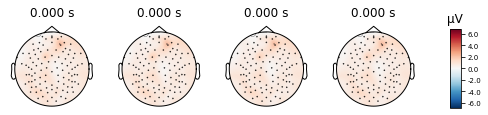

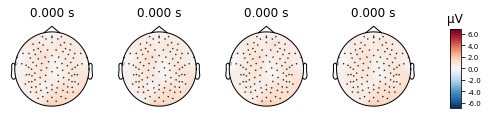

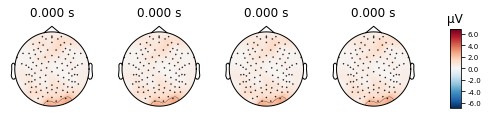

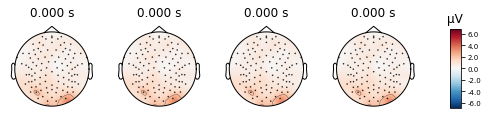

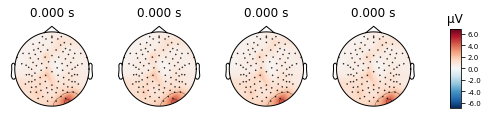

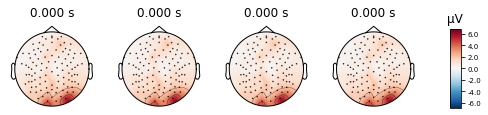

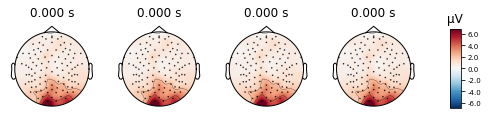

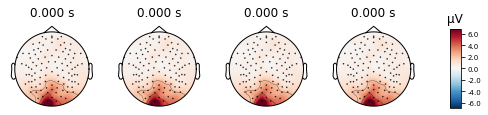

In [251]:
evoked_nr = EvokedArray(FFD_t1.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)
ax.savefig("FFD_t1.pdf")

evoked_nr = EvokedArray(FFD_t2.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)
ax.savefig("FFD_t2.pdf")

evoked_nr = EvokedArray(FFD_a1.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)
ax.savefig("FFD_a1.pdf")


evoked_nr = EvokedArray(FFD_a2.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)
ax.savefig("FFD_a2.pdf")


evoked_nr = EvokedArray(FFD_b1.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)

ax.savefig("FFD_b1.pdf")


evoked_nr = EvokedArray(FFD_b2.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)
ax.savefig("FFD_b2.pdf")

evoked_nr = EvokedArray(FFD_g1.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)

ax.savefig("FFD_g1.pdf")

evoked_nr = EvokedArray(FFD_g2.reshape(-1,1)[:104], info=info)
evoked_nr.set_montage("GSN-HydroCel-128")
ax = evoked_nr.plot_topomap(scalings=1, cmap='RdBu_r', vmin = -6.9, vmax = 6.9)

ax.savefig("FFD_g2.pdf")

In [73]:
times = np.arange(0.05, 0.151, 0.02)

evoked_nr.plot_topomap(times, ch_type='mag', time_unit='s')

ValueError: No channels of type 'mag'

In [ ]:
'FFD_t1',
 'FFD_t2',
 'FFD_a1',
 'FFD_a2',
 'FFD_b1',
 'FFD_b2',
 'FFD_g1',
 'FFD_g2'

In [33]:
    ax = evoked_nr.plot_topomap(title='EEG patterns', names =chan_names, time_unit='s', units='a.u.', scalings=1, vmin=min(diff), cmap='RdBu')


TypeError: plot_topomap() got an unexpected keyword argument 'names'

In [42]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: E2, E3, E4, E5, E6, E7, E9, E10, E11, E12, E13, E15, E16, E18, ...
 chs: 104 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 104
 projs: []
 sfreq: 500.0 Hz
>

In [11]:
rawData = f_tsr['rawData']

for idx, sent_data in enumerate(rawData):

    omissionR = f_tsr['omissionRate']
    obj_reference_omr = omissionR[idx][0]
    omr = np.array(f_tsr[obj_reference_omr])[0][0]
    
    theta1 = f_tsr['mean_t1']
    obj_reference_t1 = theta1[idx][0]
    theta2 = f_tsr['mean_t2']
    obj_reference_t2 = theta2[idx][0]
    t_electrodes = np.nanmean(np.array([np.array(f_tsr[obj_reference_t1])[:105],np.array(f_tsr[obj_reference_t2])[:105]]), axis=0)
    t_mean = np.nanmean(t_electrodes)

/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_21381/3314531810.py:13: RuntimeWarning: Mean of empty slice
  t_electrodes = np.nanmean(np.array([np.array(f_tsr[obj_reference_t1])[:105],np.array(f_tsr[obj_reference_t2])[:105]]), axis=0)
/var/folders/70/s03t_xm53wq9db1vxd6l5d8c0000gn/T/ipykernel_21381/3314531810.py:14: RuntimeWarning: Mean of empty slice
  t_mean = np.nanmean(t_electrodes)


In [23]:
feature_set = ["electrode_features_all"]

105

In [30]:
features[feature_set] = {}
features = {}
features['electrode_features_all']['subject' + "_" + 'label' + "_" + str(idx) + "_" + 'str(full_idx)'] = [t_mean, 'label']

KeyError: 'electrode_features_all'